In [106]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from matplotlib import cm

%matplotlib inline

In [46]:
kf = pickle.load(open('outputs/kfold_results.pkl', 'rb'))

In [75]:
f = np.vectorize(lambda x: np.amax(x['acc']))
# maxes = f(kf)
f(kf)

array([[0.61578947, 0.67192982, 0.70350877, 0.73813708, 0.5659051 ],
       [0.5877193 , 0.67017544, 0.69473684, 0.73286467, 0.5659051 ],
       [0.59649123, 0.70877193, 0.70350877, 0.73813708, 0.59050967],
       [0.5877193 , 0.74385965, 0.70877193, 0.75746924, 0.6344464 ],
       [0.64736842, 0.71052632, 0.70701754, 0.75922671, 0.64674868],
       [0.66491228, 0.72631579, 0.73508772, 0.74692443, 0.67838313]])

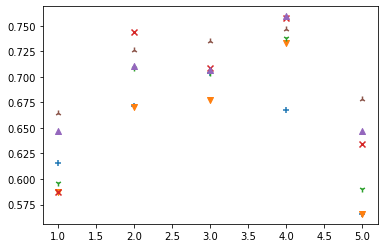

In [97]:
plt.scatter([1,2,3,4,5], maxes[0], marker='+')
plt.scatter([1,2,3,4,5], maxes[1], marker='v')
plt.scatter([1,2,3,4,5], maxes[2], marker='1')
plt.scatter([1,2,3,4,5], maxes[3], marker='x')
plt.scatter([1,2,3,4,5], maxes[4], marker='^')
plt.scatter([1,2,3,4,5], maxes[5], marker='2')

In [76]:
np.mean(maxes, axis=1)

array([0.6449943 , 0.6467715 , 0.66748374, 0.6864533 , 0.69417754,
       0.71032467])

In [79]:
np.argmax(maxes, axis=1)

array([2, 3, 3, 3, 3, 3])

In [24]:
res1 = pickle.load(open('outputs/MatmulT_1.pkl', 'rb'))
res2 = pickle.load(open('outputs/LinearT_1.pkl', 'rb'))
base = pickle.load(open('outputs/BaselineT_1.pkl', 'rb'))

sb = pickle.load(open('outputs/sbert_BaselineT_lr1e-6_1.pkl', 'rb'))
sr1 = pickle.load(open('outputs/sbert_MatmulT_lr1e-5_1.pkl', 'rb'))
sr2 = pickle.load(open('outputs/sbert_LinearT_lr5e-6_1.pkl', 'rb'))
sr22 = pickle.load(open('outputs/sbert_LinearT_lr5e-6_dr.5_2.pkl', 'rb'))

tb = pickle.load(open('outputs/tfidf_BaselineT_lr3e-6_1.pkl', 'rb'))
tr1 = pickle.load(open('outputs/tfidf_MatmulT_lr3e-6_1.pkl', 'rb'))
tr2 = pickle.load(open('outputs/tfidf_LinearT_lr3e-6_1.pkl', 'rb'))

In [34]:
tr2['acc'][100:]

100    0.619298
101    0.619298
102    0.619298
103    0.619298
104    0.619298
         ...   
195    0.619298
196    0.619298
197    0.619298
198    0.619298
199    0.619298
Name: acc, Length: 100, dtype: float64

In [131]:
cs = cm.Paired([0,1,2,3,4,5])

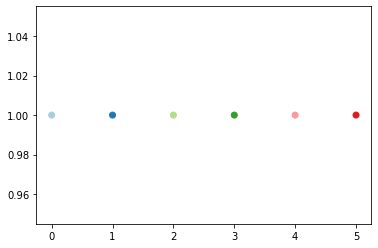

In [132]:
plt.scatter(np.arange(6), [1]*6, c=cs)

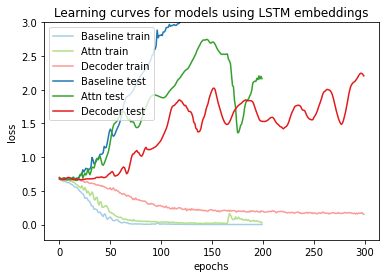

In [169]:
plt.figure(figsize=(6,4))
plt.plot(base['train'], c=cs[0])
plt.plot(res1['train'], c=cs[2])
plt.plot(res2['train'], c=cs[4])
plt.plot(base['test'], c=cs[1])
plt.plot(res1['test'], c=cs[3])
plt.plot(res2['test'], c=cs[5])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim([plt.ylim()[0], 3])
plt.legend(['Baseline train', 'Attn train', 'Decoder train', 'Baseline test', 'Attn test', 'Decoder test'])
plt.title('Learning curves for models using LSTM embeddings')
plt.savefig('SCRATCH_lc')

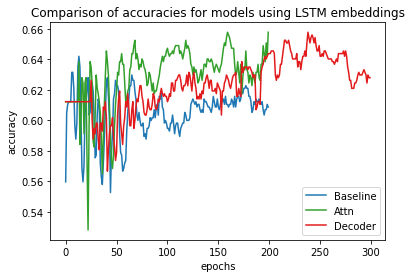

In [170]:
plt.figure(figsize=(6,4))
plt.plot(base['acc'], c=cs[1])
plt.plot(res1['acc'], c=cs[3])
plt.plot(res2['acc'], c=cs[5])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Baseline', 'Attn', 'Decoder'])
plt.title('Comparison of accuracies for models using LSTM embeddings')
plt.savefig('SCRATCH_acc.png')

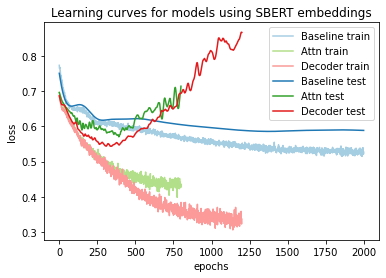

In [162]:
plt.figure(figsize=(6,4))
plt.plot(sb ['train'], c=cs[0])
plt.plot(sr1['train'], c=cs[2])
plt.plot(sr2['train'], c=cs[4])
plt.plot(sb ['test'], c=cs[1])
plt.plot(sr1['test'], c=cs[3])
plt.plot(sr2['test'], c=cs[5])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Baseline train', 'Attn train', 'Decoder train', 'Baseline test', 'Attn test', 'Decoder test'])
plt.title('Learning curves for models using SBERT embeddings')
plt.savefig('SBERT_lc.png')

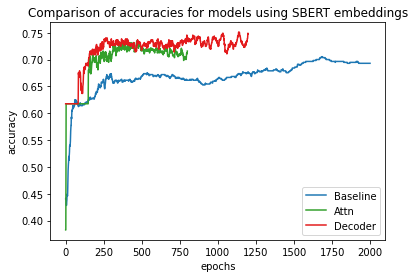

In [163]:
plt.figure(figsize=(6,4))
plt.plot( sb['acc'], c=cs[1])
plt.plot(sr1['acc'], c=cs[3])
plt.plot(sr2['acc'], c=cs[5])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Baseline', 'Attn', 'Decoder'])
plt.title('Comparison of accuracies for models using SBERT embeddings')
plt.savefig('SBERT_acc.png')

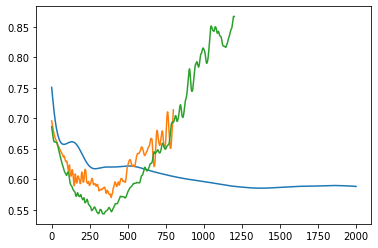

In [42]:
plt.plot(sb['test'])
plt.plot(sr1['test'])
plt.plot(sr2['test'])

In [21]:
z = pickle.load(open('data/reasons_df.pkl', 'rb'))

In [22]:
z

,id,topic,stance,substance,source,line,claim_tf_idf_embedding,tf_idf_pa_similarity,avg_w2v_embedding
0,0,abortion,Con,c-adopt,Q34,And if it is not possible for your to have a b...,"[227.53242, 95.16571, 90.81468, 413.58224, -44...","[0.48416767, 0.4241976, 0.54075974, 0.69915974...","[0.5661276, 0.5389883, 0.6098048, 0.7101158, 0..."
1,1,abortion,Con,c-kill,Q34,I believe that abortion cannot be justified be...,"[32.17483, 92.68718, 283.92633, 117.998245, -2...","[0.47884166, 0.43939564, 0.5063248, 0.70720005...","[0.44384283, 0.46450335, 0.62090343, 0.7182656..."
2,2,abortion,Con,c-baby_right,Q34,"Moreover, United Nations declaration says chil...","[-27.021324, -21.564283, 46.234787, 301.42996,...","[0.43071118, 0.45206025, 0.48450536, 0.5497553...","[0.41737673, 0.5605264, 0.58117366, 0.53856754..."
3,3,abortion,Con,c-baby_right,M25,"Even if it doesn't have a brain, my belief is ...","[357.5555, -13.070822, 262.6633, 333.12784, -2...","[0.44407952, 0.4239362, 0.49705744, 0.70402575...","[0.40784317, 0.45864588, 0.5202222, 0.669624, ..."
4,4,abortion,Con,c-sex,O43,"Can't you use a condom while having sex. Yes, ...","[182.9457, 77.004105, 34.06093, 160.79187, -15...","[0.41161808, 0.39982748, 0.43759474, 0.6643834...","[0.46884528, 0.42420495, 0.49323082, 0.6081152..."
...,...,...,...,...,...,...,...,...,...
2843,2843,obama,Pro,p-quality,B64,"While I wish he would have accomplished more, ...","[217.3269, 203.28893, 110.26104, 295.20947, -1...","[0.5100023, 0.41690615, 0.553481, 0.7322623, 0...","[0.48527277, 0.50043356, 0.57313573, 0.6658959..."
2844,2844,obama,Pro,p-republicans,B64,Obama inherited many of the deficiencies lefto...,"[285.06503, 322.81372, 154.35544, 362.61212, -...","[0.39890993, 0.26361057, 0.3582708, 0.5272109,...","[0.3314036, 0.3014497, 0.33637276, 0.43141872,..."
2845,2845,obama,Con,c-War,F38,He has gotten troops out of countries Bush...,"[166.51376, 182.42606, 281.36407, 244.29797, -...","[0.39314574, 0.4079126, 0.45908293, 0.6267522,...","[0.41485694, 0.4361237, 0.46337822, 0.595646, ..."
2846,2846,obama,Pro,p-economy,K33,fincial reform- made the banks do their buince...,"[246.23344, 331.38638, 234.50464, 365.0967, -3...","[0.48969442, 0.34099227, 0.43148765, 0.6171639...","[0.49895176, 0.36892983, 0.4601441, 0.55394155..."
